# Regression-with-PyCaret

In [46]:
#importing the pycaret library for our project
from pycaret.regression import *

In [47]:
# Loading the dataset

train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
sample_data= pd.read_csv('sample_submission.csv')

In [48]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
#Data preprocessing
dmw = setup(data = train_data, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,8706
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 389)"


In [51]:
#let's compare different regression models!

compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15858.8064,876158522.8299,27618.6791,0.8746,0.1347,0.0928,7.7330
gbr,Gradient Boosting Regressor,17921.1014,1014907014.2482,29557.9723,0.8559,0.1477,0.1065,0.8410
huber,Huber Regressor,16582.2654,1115368030.8543,28850.7386,0.8544,0.1415,0.0988,0.3230
rf,Random Forest Regressor,18692.7143,987711564.2469,30413.8612,0.8524,0.1585,0.1123,1.2270
par,Passive Aggressive Regressor,17121.2844,1172305761.6742,30130.1983,0.8442,0.1443,0.1019,0.4460
lightgbm,Light Gradient Boosting Machine,18587.8998,1081675359.2638,31328.4665,0.8423,0.1547,0.1087,0.2350
xgboost,Extreme Gradient Boosting,19561.5115,1126933066.7151,32144.7012,0.8322,0.1610,0.1137,1.5580
br,Bayesian Ridge,19307.6489,1388237914.2612,32813.6478,0.8145,0.1648,0.1172,0.2730
ridge,Ridge Regression,20033.2734,1455541197.9157,33987.4060,0.8022,0.1753,0.1210,0.0280
ada,AdaBoost Regressor,24663.6337,1393998963.3517,36370.9952,0.7883,0.2114,0.1648,0.2840


In [52]:
#Create model
byc = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24169.8241,3371609931.7380,58065.5658,0.6479,0.2132,0.1373
1,19832.9431,1140242377.8810,33767.4751,0.8667,0.1626,0.1136
2,17457.7693,684650712.3685,26165.8310,0.8830,0.1460,0.1048
3,16625.7392,658179063.5894,25655.0008,0.9127,0.1309,0.0957
4,18261.2111,618057788.1483,24860.7681,0.8684,0.1400,0.1063
5,17707.9021,945100232.6790,30742.4825,0.8595,0.1636,0.1076
6,20248.8604,1053192640.8947,32452.9296,0.8253,0.1429,0.1039
7,20326.8223,1131037737.2013,33630.9045,0.8154,0.1511,0.1076
8,12903.7107,333215162.9006,18254.1821,0.9114,0.1209,0.0858


In [53]:
# Model tuning

tuned_byc = tune_model(byc)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27068.8853,3104216941.3830,55715.5000,0.6758,0.2194,0.1599
1,22696.3196,1174554998.0128,34271.7814,0.8626,0.1803,0.1370
2,19082.7287,715445655.8757,26747.8159,0.8778,0.1480,0.1117
3,19201.4417,840555145.4346,28992.3291,0.8885,0.1433,0.1073
4,17649.0740,709014095.2827,26627.3186,0.8491,0.1467,0.1038
5,18028.2477,1199589502.4550,34635.0906,0.8216,0.1525,0.1060
6,21549.0969,1225994848.9128,35014.2092,0.7966,0.1574,0.1141
7,20759.1227,971623876.5798,31170.8819,0.8415,0.1684,0.1234
8,15427.6767,511745274.5070,22621.7876,0.8639,0.1386,0.0993


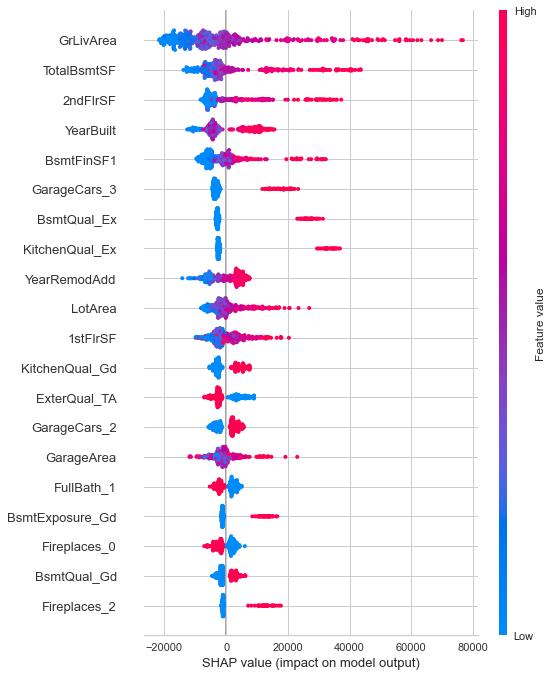

In [54]:
#SHAP Values (impact on model output) pip install shap to use interpret_model function.Shapley Additive exPlanations
interpret_model(tuned_byc)

In [55]:
# Predictions

predictions = predict_model(tuned_byc, data = test_data)
sample['SalePrice'] = predictions['Label']
sample.to_csv('final_house_price.csv',index=False)
sample.head(10)

,Id,SalePrice
0,1461,104000.231222
1,1462,165739.478021
2,1463,170112.936169
3,1464,170344.794242
4,1465,174666.511063
5,1466,163684.714936
6,1467,164345.687536
7,1468,152249.808832
8,1469,188897.285824
9,1470,117087.166727


In [57]:
ss = pd.read_csv("final_house_price.csv")
ss.head()

,Id,SalePrice
0,1461,104000.231222
1,1462,165739.478021
2,1463,170112.936169
3,1464,170344.794242
4,1465,174666.511063
